In [ ]:
%pip install matplotlib

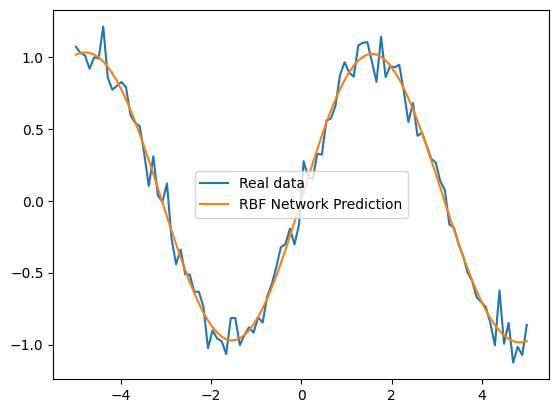

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


class RBFNetwork:
    def __init__(self, num_centers):
        self.num_centers = num_centers
        self.centers = None
        self.weights = None

    def gaussian_rbf(self, x, center):
        return np.exp(-np.linalg.norm(x - center) ** 2 / (2 * self.sigma ** 2))

    def calculate_interpolation_matrix(self, X):
        G = np.zeros((X.shape[0], self.num_centers))
        for i, x in enumerate(X):
            for j, c in enumerate(self.centers):
                G[i, j] = self.gaussian_rbf(x, c)
        return G

    def fit(self, X, y):
        kmeans = KMeans(n_clusters=self.num_centers, random_state=0).fit(X)
        self.centers = kmeans.cluster_centers_

        d_max = np.max([np.linalg.norm(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.sigma = d_max / np.sqrt(2 * self.num_centers)

        G = self.calculate_interpolation_matrix(X)

        self.weights = np.linalg.pinv(G).dot(y)

    def predict(self, X):
        G = self.calculate_interpolation_matrix(X)
        return G.dot(self.weights)


X = np.linspace(-5, 5, 100).reshape(-1, 1)
y = np.sin(X).ravel()


y += 0.1 * np.random.randn(y.shape[0])


rbf_net = RBFNetwork(num_centers=10)
rbf_net.fit(X, y)

y_pred = rbf_net.predict(X)

plt.plot(X, y, label="Real data")
plt.plot(X, y_pred, label="RBF Network Prediction")
plt.legend()
plt.show()
